# Time Series Forecasting of Typhoid Incidence Using Statistical Models

## Data Wrangling

**1. Gather**

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plotting style
# Set default plotting style and set all parematers as standard ready to publish plots
def set_plotting_style():
    # Set the default style
    sns.set_style("darkgrid")

    # Set the default context with font scale
    sns.set_context("paper",
                    font_scale=1.3, rc={"lines.linewidth": 1.0})

    # Set the default color palette
    sns.set_palette("plasma")

    # Set the default figure size
    plt.rcParams['figure.figsize'] = [12, 6]

# Call the function to set the default plotting style
set_plotting_style()

# Ignore warnings
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

In [2]:
# Load the data
typhoid_df = pd.read_csv("typhoid.csv")

# Print the first few rows of the data
typhoid_df.head()

,date,typhoid_cases
0,2010-01,18
1,2010-02,19
2,2010-03,6
3,2010-04,28
4,2010-05,34


In [3]:
# The last five entries of our data
typhoid_df.tail()

,date,typhoid_cases
151,2022-08,28
152,2022-09,21
153,2022-10,17
154,2022-11,25
155,2022-12,13


**2. Assess**

In [4]:
# Get the info of our data
typhoid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           156 non-null    object
 1   typhoid_cases  156 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [5]:
# Get a statistical summary of our data
typhoid_df.describe()

,typhoid_cases
count,156.000000
mean,25.346154
std,11.747699
min,6.000000
25%,17.000000
50%,24.000000
75%,31.000000
max,84.000000


In [6]:
# Check for duplicates
typhoid_df.duplicated().sum()

0

**Summary:**
1. There are no missing values in our data. 
2. There are no duplicates in our data. 
3. The dates column isn't in the correct datetime formate. 

**Clean**

In [7]:
from pandas.tseries.offsets import MonthEnd

# Convert the date column to datetime format
typhoid_df['date'] = pd.to_datetime(typhoid_df['date'], format='%Y-%m')

# Get the last day of each month
typhoid_df['date'] = typhoid_df['date'] + MonthEnd(0)

# Set the date column as the index of the dataframe
typhoid_df.set_index('date', inplace=True)

In [8]:
# Print the first five rows of our data
typhoid_df.head()

,typhoid_cases
date,
2010-01-31,18
2010-02-28,19
2010-03-31,6
2010-04-30,28
2010-05-31,34


In [9]:
# Print the last five rows of our data
typhoid_df.tail()

,typhoid_cases
date,
2022-08-31,28
2022-09-30,21
2022-10-31,17
2022-11-30,25
2022-12-31,13


In [10]:
# Get the info of our data
typhoid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2010-01-31 to 2022-12-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   typhoid_cases  156 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


**Summary**
- We now have a clean dataset for our time series analysis. 

## Exploratory Data Analysis

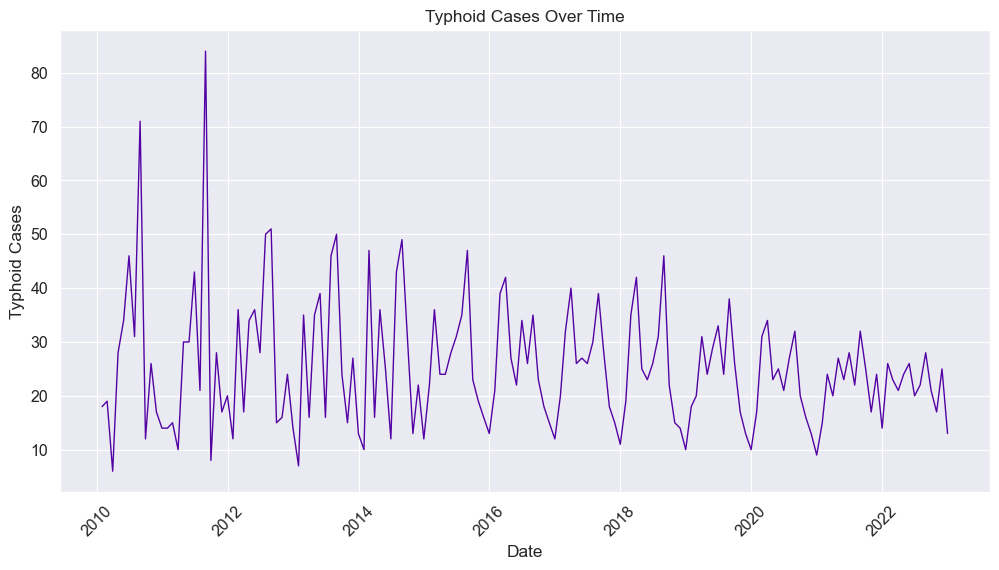

In [11]:
# Create a line plot
sns.lineplot(data=typhoid_df, x='date', y='typhoid_cases')

# Add title and labels
plt.xticks(rotation=45)
plt.title('Typhoid Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Typhoid Cases')

# Show the plot
plt.show()

**Interpretation of the plot:**
- The plot shows the number of thyroid cases over time, from 2010 to 2022. The y-axis shows the number of cases, and the x-axis shows the date.

The overall trend of the plot is downwards, meaning that the number of thyroid cases has decreased over time. This is good news, as it suggests that public health measures to control typhoid are working. However, it is important to note that there is still some variation in the number of cases from year to year. For example, there was a slight increase in cases in 2016, followed by a decrease in 2018.

It is also worth noting that the data only goes up to 2022, so it is too early to say whether the downward trend will continue in the long term. However, the overall trend is positive, and it is encouraging to see that public health measures are having an impact.

Here are some specific observations about the plot:

* The plot shows a clear downward trend in the number of thyroid cases over time.
* There is some variation in the number of cases from year to year, but the overall trend is downwards.
* The number of cases decreased significantly from 2010 to 2014.
* The number of cases increased slightly in 2016, but then decreased again in 2018.
* The number of cases continued to decrease in 2020 and 2022.

Overall, the plot suggests that public health measures to control typhoid are working. However, it is important to continue to monitor the number of cases and to ensure that public health measures are maintained.

### Decomposing Time Series Data


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [13]:
# Seasonal Decomposition 
typhoid_df_decomposed = seasonal_decompose(typhoid_df, 
                                          model='miltiplicative')

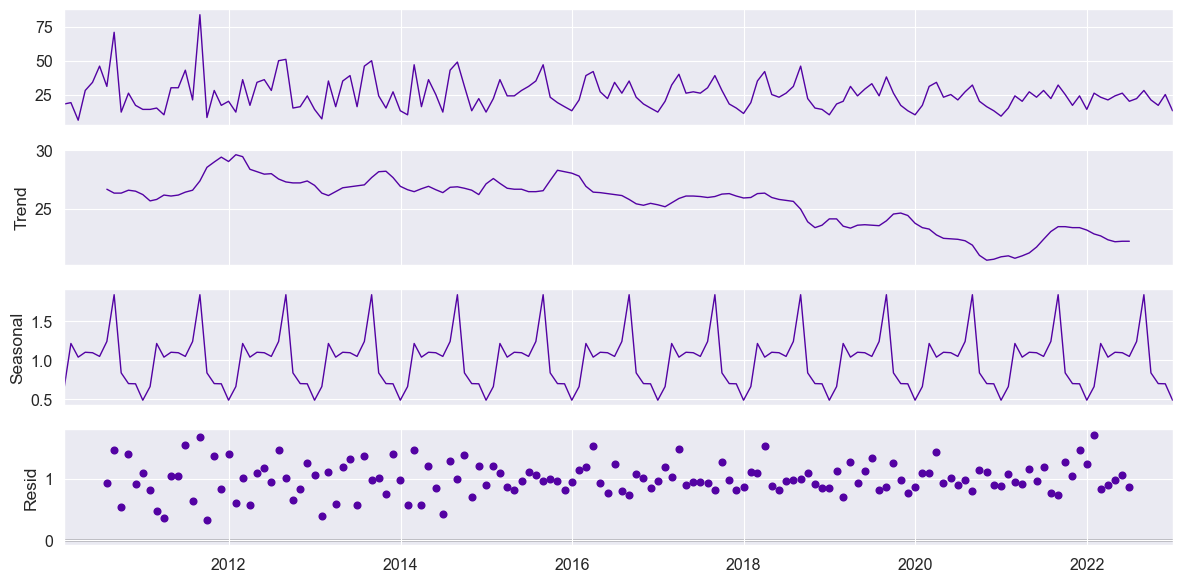

In [14]:
# Plot the results
typhoid_df_decomposed.plot()
plt.show();

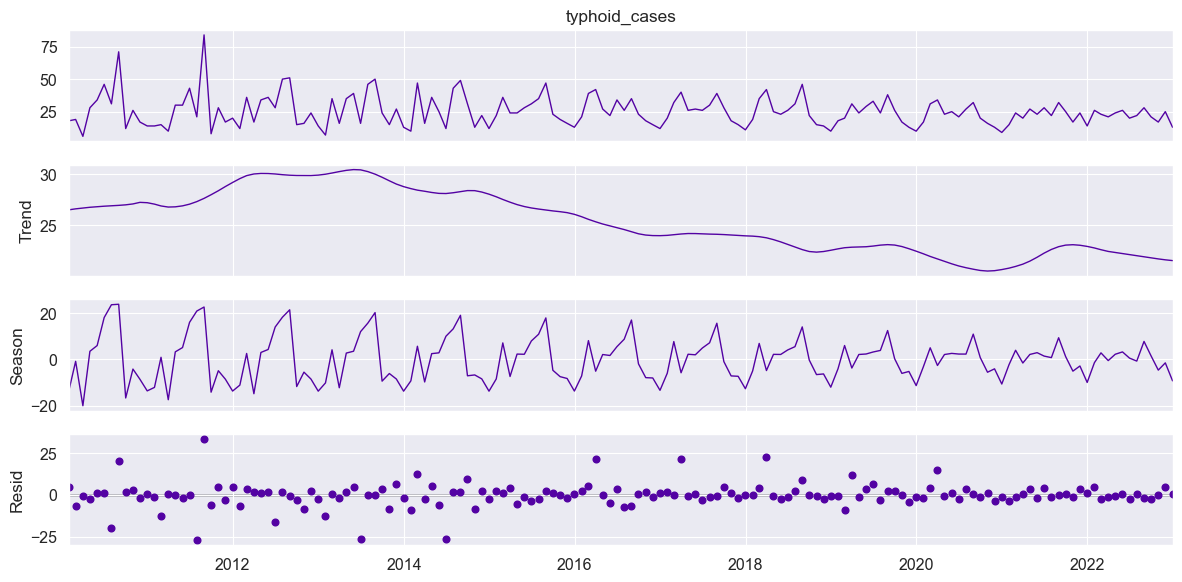

In [15]:
typhoid_df_stl = STL(typhoid_df['typhoid_cases'], 
                    seasonal=13, 
                    robust=True).fit()
typhoid_df_stl.plot()
plt.show();

**Summary:**
- There is a downward trend indicating that the number of typhoid cases have been decreasing over a long period of time. 
- There is a strong evidence of seasonality in our time series data. 

<Axes: title={'center': 'Typhoid Trend Component'}, xlabel='date'>

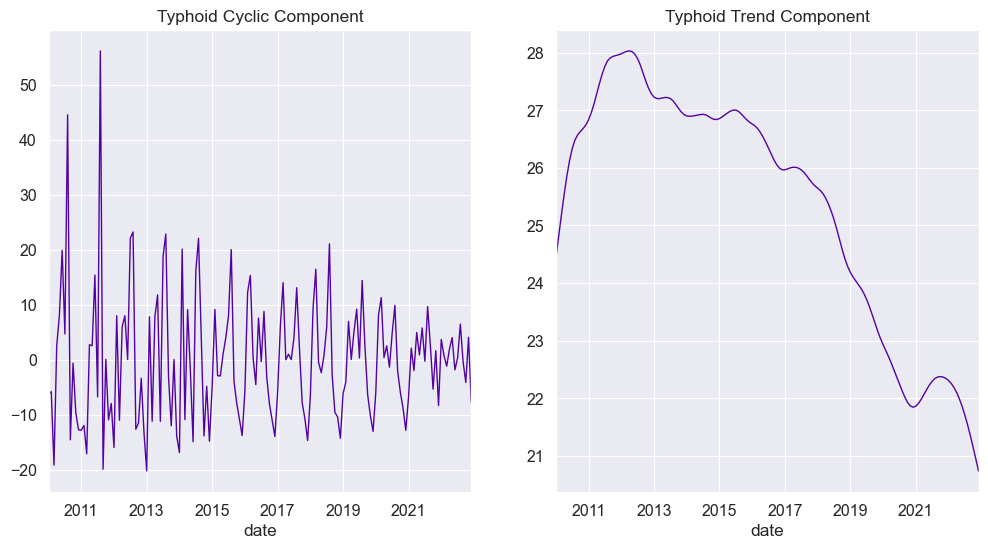

In [16]:
# Separating short-term fluctuations (cyclic variations) from long-term trend
from statsmodels.tsa.filters.hp_filter import hpfilter
typhoid_df_cyclic, typhoid_df_trend = hpfilter(typhoid_df)

# Plot
fig, ax = plt.subplots(1, 2)
typhoid_df_cyclic.plot(ax=ax[0], title='Typhoid Cyclic Component')
typhoid_df_trend.plot(ax=ax[1], title='Typhoid Trend Component')

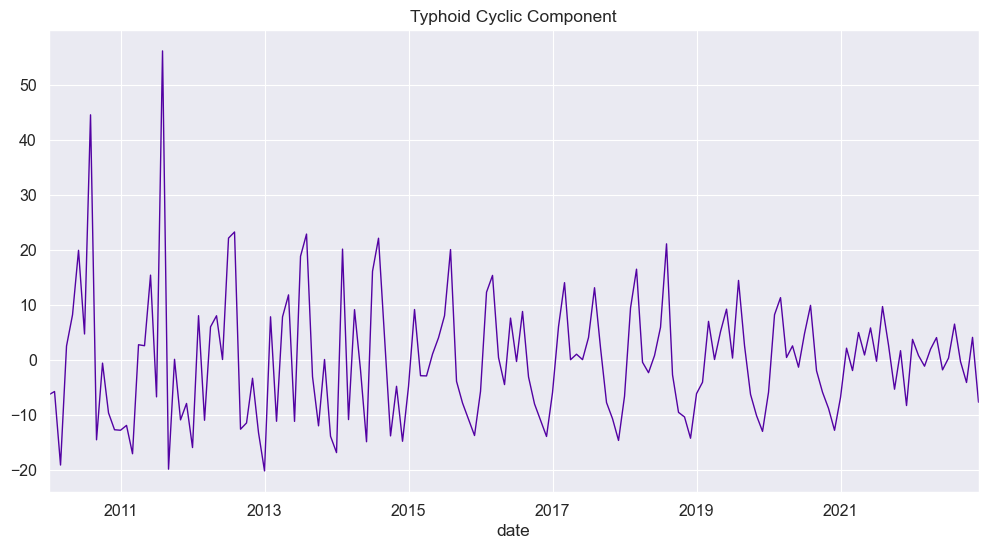

In [17]:
# Plot the cyclic component
typhoid_df_cyclic.plot(title='Typhoid Cyclic Component')
plt.show();

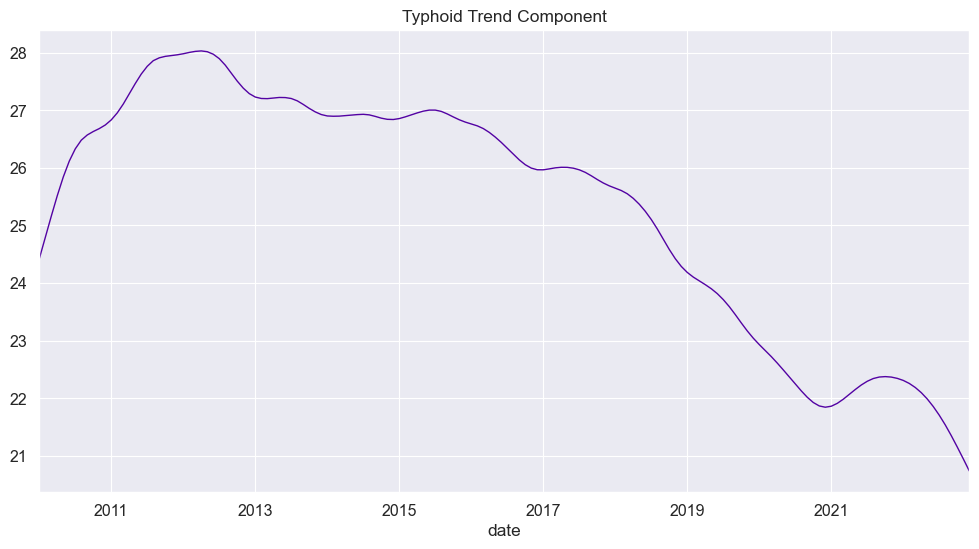

In [18]:
# Plot the trend component
typhoid_df_trend.plot(title='Typhoid Trend Component')
plt.show();

### Detecting Time Series Stationarity
- Several time series forecasting techniques assume ***stationarity***. This makes it essential to understand whether the time series you are working with is `stationary` or `non-stationary`.
- A `stationary` time series is defined as a time series with:
	1. a contant mean,
	2. a constant variance,
	3. a consistent covariance (or autocorrelation).
    
- We will conduct two tests:
	1. ADF test.
    2. KPSS test.

In [19]:
from statsmodels.tsa.stattools import adfuller, kpss

In [20]:
def print_results(output, test='adf'):        
    pval = output[1]    
    test_score = output[0]    
    lags = output[2]        
    decision = 'Non-Stationary'    
    if test == 'adf':        
        critical = output[4]        
        if pval < 0.05:            
            decision = 'Stationary'    
    elif test=='kpss':        
        critical = output[3]        
        if pval >= 0.05:            
            decision = 'Stationary'                
    output_dict = {
                'Test Statistic': test_score,    
                'p-value': pval,    
                'Numbers of lags': lags,    
                'decision': decision
            }    
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value           
        
    return pd.Series(output_dict, name=test)

In [21]:
# Run both adf and kpss tests
adf_output = adfuller(typhoid_df)
kpss_output = kpss(typhoid_df)

In [22]:
pd.concat([
    print_results(adf_output, 'adf'),
    print_results(kpss_output, 'kpss')
], axis=1)

,adf,kpss
Test Statistic,-0.949172,0.348979
p-value,0.771349,0.099147
Numbers of lags,12,2
decision,Non-Stationary,Stationary
Critical Value (1%),-3.476927,0.739
Critical Value (5%),-2.881973,0.463
Critical Value (10%),-2.577665,0.347
Critical Value (2.5%),NaN,0.574


The ADF (Aumented Dickey-Fuller) test indicates `non-stationarity` while the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test suggests stationarity. This could be due to sensitivity of these tests to different types of non-stationarity. 
We therefore have to examine the specific characteristics of our data and potentially explore alternative stationarity tests or transformation techniques to gain a better understanding of its behaviour. 
Additionally, visual inspection and domain knowledge do provide valuable insights into the nature of the time series data. 

**Conclusion**
- By visual inspection and domain knowledge, the data is `non-stationary`.

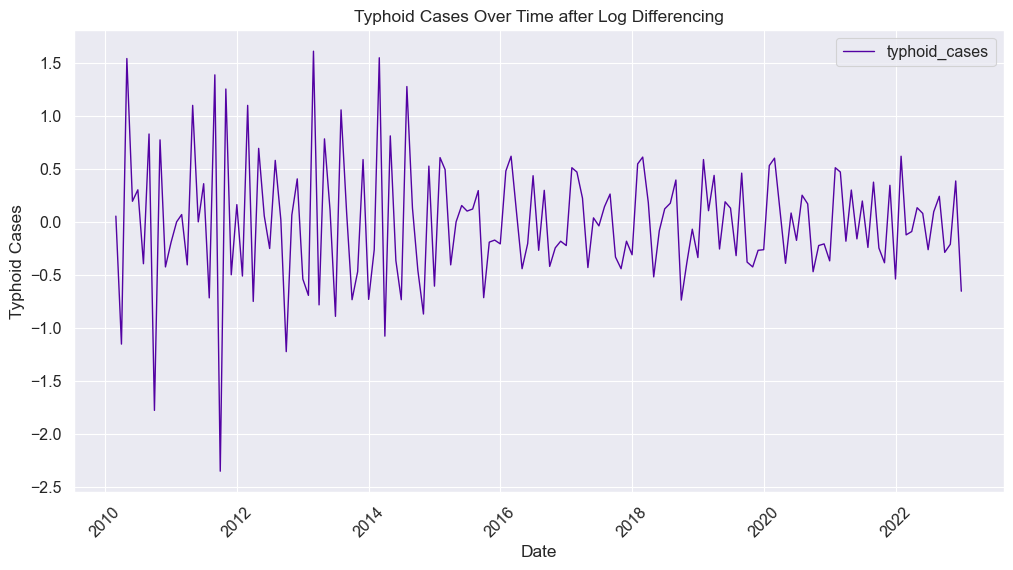

In [23]:
# Apply log differencing
typhoid_df_diff = np.log(typhoid_df).diff().dropna()

# Create a line plot
sns.lineplot(data=typhoid_df_diff)

# Add title and labels
plt.xticks(rotation=45)
plt.title('Typhoid Cases Over Time after Log Differencing')
plt.xlabel('Date')
plt.ylabel('Typhoid Cases')

# Show the plot
plt.show()

In [24]:
typhoid_df_diff.head()

,typhoid_cases
date,
2010-02-28,0.054067
2010-03-31,-1.152680
2010-04-30,1.540445
2010-05-31,0.194156
2010-06-30,0.302281


In [25]:
# Run both adf and kpss tests
adf_output = adfuller(typhoid_df_diff)
kpss_output = kpss(typhoid_df_diff);

C:\Users\HP\AppData\Local\Temp\ipykernel_14580\3941990702.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_output = kpss(typhoid_df_diff);


In [26]:
pd.concat([
    print_results(adf_output, 'adf'),
    print_results(kpss_output, 'kpss')
], axis=1)

,adf,kpss
Test Statistic,-19.324878,0.100103
p-value,0.0,0.1
Numbers of lags,10,17
decision,Stationary,Stationary
Critical Value (1%),-3.476598,0.739
Critical Value (5%),-2.881829,0.463
Critical Value (10%),-2.577589,0.347
Critical Value (2.5%),NaN,0.574


In [27]:
# Testing for homogeneity of variance


The data is now stationary. 

### Detecting Autocorrelation.

- Use `Ljung-Box` test and also plot `ACF` and `PACF` plots. 

In [28]:
# Using Ljong-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(typhoid_df_diff, lags=20, return_df=True)

,lb_stat,lb_pvalue
1,34.635227,3.976449e-09
2,36.089827,1.456108e-08
3,36.369401,6.255712e-08
4,36.481530,2.303343e-07
5,45.400239,1.202926e-08
6,63.750591,7.759719e-12
7,68.336935,3.201066e-12
8,71.652947,2.301794e-12
9,73.466171,3.171581e-12
10,73.617315,8.835718e-12


This shows that the test statistic for all lags up to lag 20 are significant (*p-value < 0.05*), so we reject the null hypothesis and conclude that the data does exhibit a serial correlation. 

In [29]:
# Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

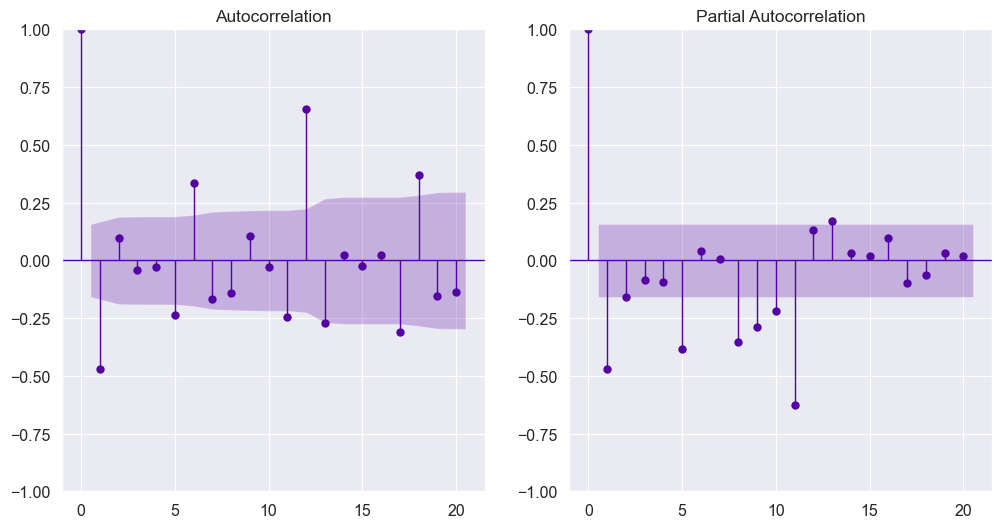

In [30]:
fig, ax = plt.subplots(1, 2)
plot_acf(typhoid_df_diff, lags=20, ax=ax[0])
plot_pacf(typhoid_df_diff, lags=20, ax=ax[1])
plt.show()

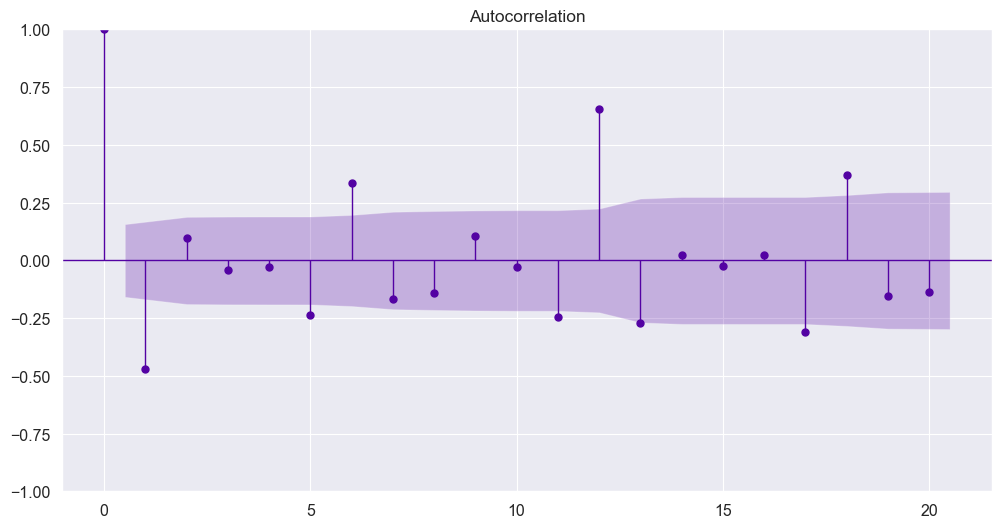

In [31]:
# Make the ACF Plot
fig = plot_acf(typhoid_df_diff, lags=20)
plt.show()

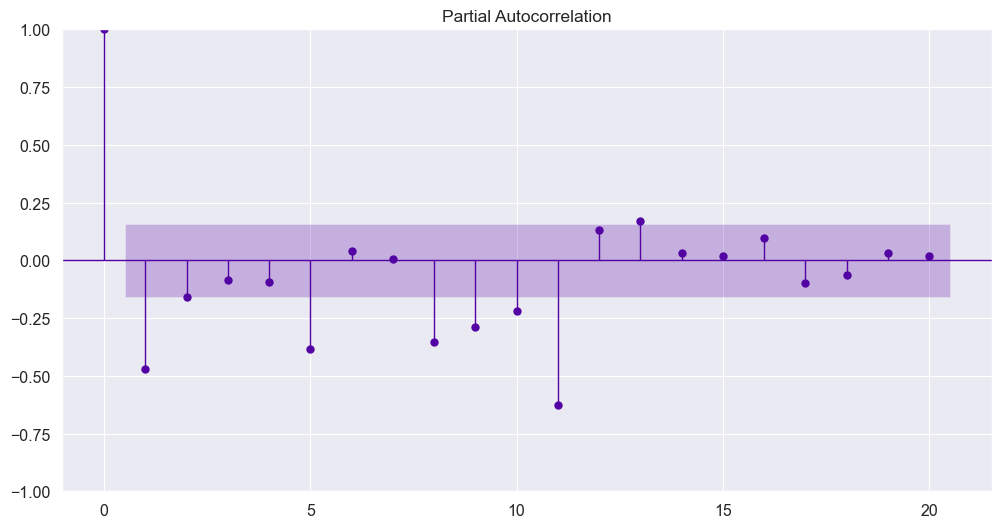

In [32]:
# Make the PACF Plot

fig = plot_pacf(typhoid_df_diff, lags=20)
plt.show()

In [33]:
from pandas.plotting import lag_plot, autocorrelation_plot

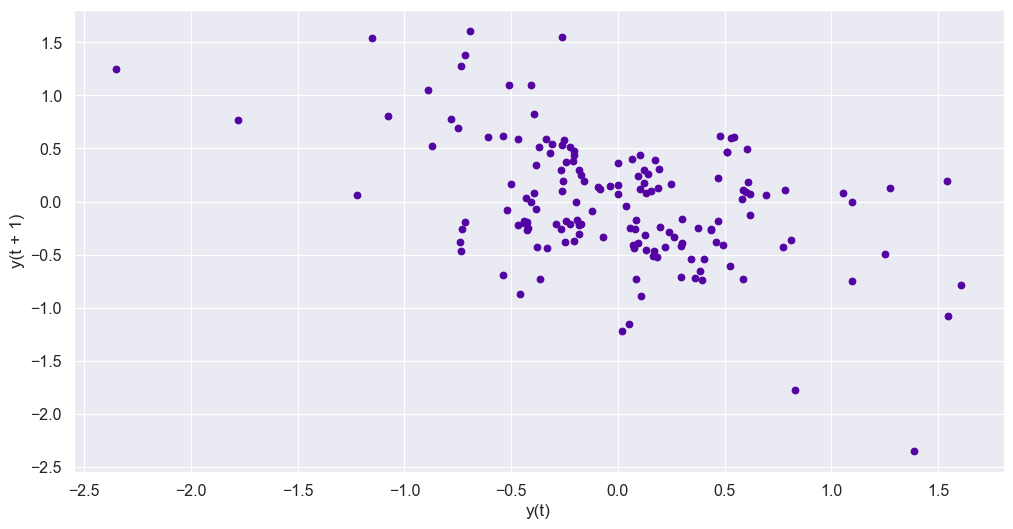

In [34]:
lag_plot(typhoid_df_diff);

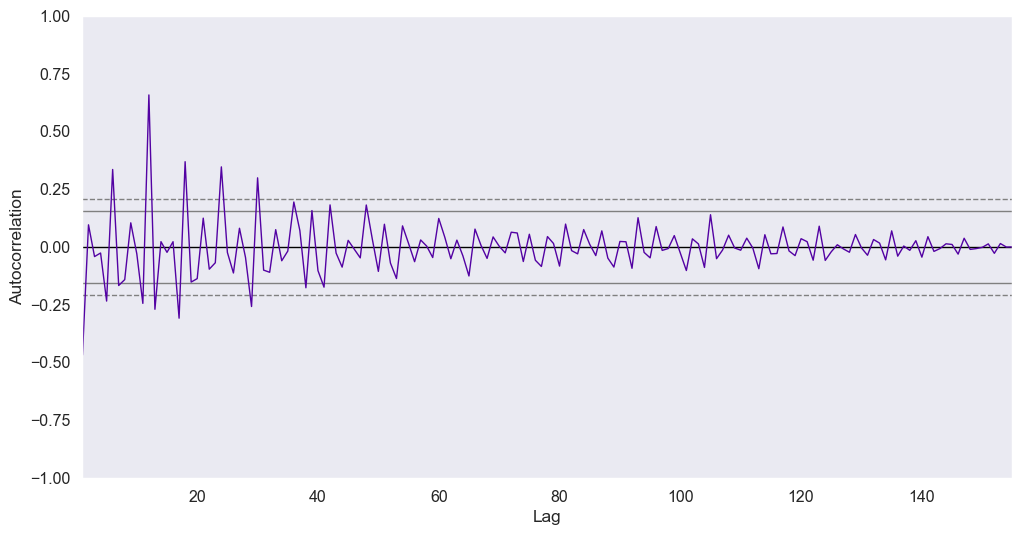

In [35]:
autocorrelation_plot(typhoid_df_diff);

From the ACF plot, we observe that the ACF values at lags 1, 5, 6, 11, 12, 18 are significantly nonzero. This indicates that there are both autocorrelation and seasonal correlation in the resulting series. 

## Modeling

**1. SARIMA(p, d, q)(P, D, Q)m**

In [36]:
# Import pmdarima
import pmdarima as pm 
from pmdarima.model_selection import train_test_split

# Split the data into train and test sets
train, test = train_test_split(typhoid_df_diff['typhoid_cases'], test_size=12)

In [37]:
from itertools import product

# Define the list of possible orders for our model
ps = range(0, 6, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

d = 1
D = 0
s = 12

SARIMA_order_list = list(product(ps, qs, Ps, Qs))

In [38]:
import warnings
warnings.simplefilter('ignore')
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the Grid Search function
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d:
                   int, D: int, s: int) -> pd.DataFrame:
    results = []
    
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(
            endog, trend = 'c',
            order = (order[0], d, order[1]), 
            seasonal_order = (order[2], D, order[3], s), 
            simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q, P, Q)', 'AIC']
    
    # Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df 

In [39]:
# Grid Search (to get the best paraneters and hyperparameters for our model)
# SARIMA_result_df = optimize_SARIMA(train_df, SARIMA_order_list, d, D, s)
# SARIMA_result_df

In [40]:
auto_model = pm.auto_arima(train, 
                           m=12, 
                           d=0,
                           seasonal=True, 
                           trace=True, 
                           stepwise=True, 
                           stationary=True, 
                           max_order=10, 
                           test='adf', 
                           n_jobs=-1) 

auto_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=69.936, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=263.818, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=100.121, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=261.819, Time=0.06 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=67.678, Time=0.84 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=69.245, Time=1.66 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=72.312, Time=1.74 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=65.142, Time=0.69 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=66.839, Time=1.74 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=66.673, Time=1.14 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.8

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  143
Model:             SARIMAX(2, 0, 3)x(1, 0, [], 12)   Log Likelihood                 -21.714
Date:                             Fri, 17 Nov 2023   AIC                             59.429
Time:                                     20:04:37   BIC                             83.132
Sample:                                 02-28-2010   HQIC                            69.061
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.431e-05      0.002     -0.009      0.993      -0.003       0.003
ar.L1         -0.6274      0.082     -7.619      0.000      -0.789      -0.466
ar.L2         -0.7778      0.095     -8.187      0.000      -0.964      -0.592
ma.L1         -0.3708      0.057     -6.531      0.000      -0.482      -0.260
ma.L2          0.3872      0.069      5.641      0.000       0.253       0.522
ma.L3         -0.9405      0.073    -12.858      0.000      -1.084      -0.797
ar.S.L12       0.8210      0.041     20.221      0.000       0.741       0.901
sigma2         0.0694      0.008      8.204      0.000       0.053       0.086
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.40
Prob(Q):                              0.92   Prob(JB):                         0.04
Heteroskedasticity (H):               0.43   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
# Set a fixed random seed for reproducibility
import random
random.seed(123)

from sklearn.metrics import mean_squared_error

model = auto_model  # seeded from the model we've already fit

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)

print(f"Mean squared error: {mean_squared_error(test, forecasts)}")

Mean squared error: 0.03464142802384367


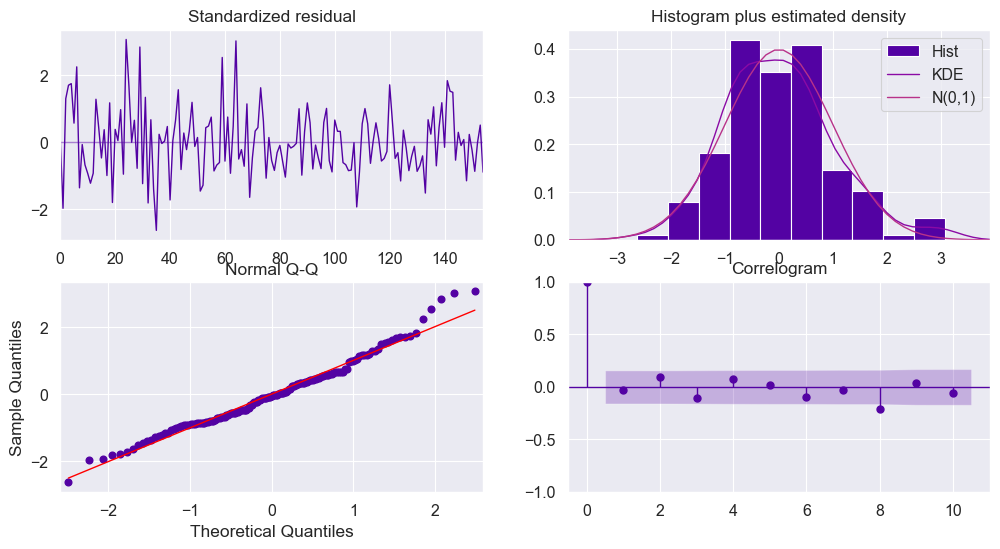

In [42]:
# Model Diagnostics
auto_model.plot_diagnostics()
plt.show();

In [43]:
import pandas as pd

# Assuming 'test' is your Pandas Series for the test set and 'forecast' is the list of forecasted cases
# Adjust the column names based on your actual data

# Create a DataFrame for the test set
df_test = pd.DataFrame({'date': test.index, 'typhoid_cases': test.values})

# Create a DataFrame for the forecasted cases
df_forecast = pd.DataFrame({'date': test.index, 'Typhoid_Cases_Forecast': forecasts})

# Merge the DataFrames on the 'Date' column
df_combined = pd.merge(df_test, df_forecast, on='date', how='outer')

# Set the 'Date' column as the index
df_combined.set_index('date', inplace=True)

# Display the resulting DataFrame
print(df_combined)


            typhoid_cases  Typhoid_Cases_Forecast
date                                             
2022-01-31       0.619039                0.208655
2022-02-28      -0.122602                0.023035
2022-03-31      -0.090972               -0.156518
2022-04-30       0.133531                0.146750
2022-05-31       0.080043                0.056356
2022-06-30      -0.262364                0.045211
2022-07-31       0.095310                0.031932
2022-08-31       0.241162                0.298165
2022-09-30      -0.287682               -0.065026
2022-10-31      -0.211309               -0.205845
2022-11-30       0.385662                0.250592
2022-12-31      -0.653926               -0.427386


In [44]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2022-01-31 to 2022-12-31
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   typhoid_cases           12 non-null     float64
 1   Typhoid_Cases_Forecast  12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


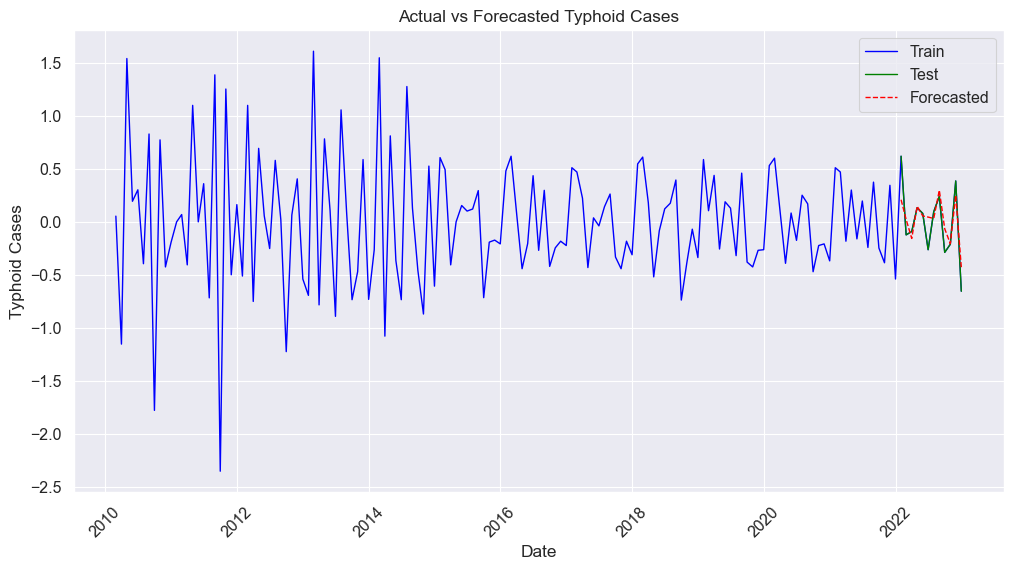

In [45]:
# Plot actual and forecasted values using Seaborn
from matplotlib.lines import Line2D
sns.lineplot(data = typhoid_df_diff, x = 'date', y = 'typhoid_cases', label = 'Train', color='blue')
sns.lineplot(data=df_combined, x='date', y='typhoid_cases', label='Test', color='green')
sns.lineplot(data=df_combined, 
             x='date', 
             y='Typhoid_Cases_Forecast', 
             label='Forecasted', 
             color='red', 
             linestyle='--')

plt.xticks(rotation = 45)
plt.title('Actual vs Forecasted Typhoid Cases')
plt.xlabel('Date')
plt.ylabel('Typhoid Cases')
plt.legend()
plt.show()

In [46]:
series = typhoid_df["typhoid_cases"]
new_series = np.log(series).diff()
# getting only the value of zeroth index since the diff() operation looses first value.
new_series.iloc[0] = np.log(series.iloc[0])
result = np.exp(new_series.cumsum())

# Assuming typhoid_df has a datetime index
new_series_df = pd.DataFrame(new_series, columns=['typhoid_cases'])

# Assuming typhoid_df has a datetime index
new_series_df.index = typhoid_df.index

# If typhoid_df does not have a datetime index, and you have a datetime column named 'date_column'
# new_series_df.index = pd.to_datetime(typhoid_df['date_column'])

new_series_df.head()

,typhoid_cases
date,
2010-01-31,2.890372
2010-02-28,0.054067
2010-03-31,-1.152680
2010-04-30,1.540445
2010-05-31,0.194156


In [47]:
# Assuming new_series_df is your DataFrame
new_series_df = new_series_df.iloc[:-12]

# Display the modified DataFrame
new_series_df

,typhoid_cases
date,
2010-01-31,2.890372
2010-02-28,0.054067
2010-03-31,-1.152680
2010-04-30,1.540445
2010-05-31,0.194156
...,...
2021-08-31,0.374693
2021-09-30,-0.246860
2021-10-31,-0.385662


In [48]:
df_forecast

,date,Typhoid_Cases_Forecast
0,2022-01-31,0.208655
1,2022-02-28,0.023035
2,2022-03-31,-0.156518
3,2022-04-30,0.146750
4,2022-05-31,0.056356
5,2022-06-30,0.045211
6,2022-07-31,0.031932
7,2022-08-31,0.298165
8,2022-09-30,-0.065026
9,2022-10-31,-0.205845


In [49]:
import pandas as pd

# Assuming df_forecast has columns 'date' and 'Typhoid_Cases_Forecast'
df_forecast['date'] = pd.to_datetime(df_forecast['date'])  # Convert 'date' column to datetime
df_forecast.set_index('date', inplace=True)  # Set 'date' column as the index
df_forecast.rename(columns={'Typhoid_Cases_Forecast': 'typhoid_cases'}, inplace=True)  # Rename the column

# Display the modified DataFrame
print(df_forecast)


            typhoid_cases
date                     
2022-01-31       0.208655
2022-02-28       0.023035
2022-03-31      -0.156518
2022-04-30       0.146750
2022-05-31       0.056356
2022-06-30       0.045211
2022-07-31       0.031932
2022-08-31       0.298165
2022-09-30      -0.065026
2022-10-31      -0.205845
2022-11-30       0.250592
2022-12-31      -0.427386


In [50]:
# Assuming new_series_df and df_forecast have datetime indices
result_df = pd.concat([new_series_df, df_forecast], axis=0)

# Display the resulting DataFrame
print(result_df)


            typhoid_cases
date                     
2010-01-31       2.890372
2010-02-28       0.054067
2010-03-31      -1.152680
2010-04-30       1.540445
2010-05-31       0.194156
...                   ...
2022-08-31       0.298165
2022-09-30      -0.065026
2022-10-31      -0.205845
2022-11-30       0.250592
2022-12-31      -0.427386

[156 rows x 1 columns]


In [51]:
result = np.exp(result_df.cumsum())
result

,typhoid_cases
date,
2010-01-31,18.000000
2010-02-28,19.000000
2010-03-31,6.000000
2010-04-30,28.000000
2010-05-31,34.000000
...,...
2022-08-31,26.913914
2022-09-30,25.219509
2022-10-31,20.527644


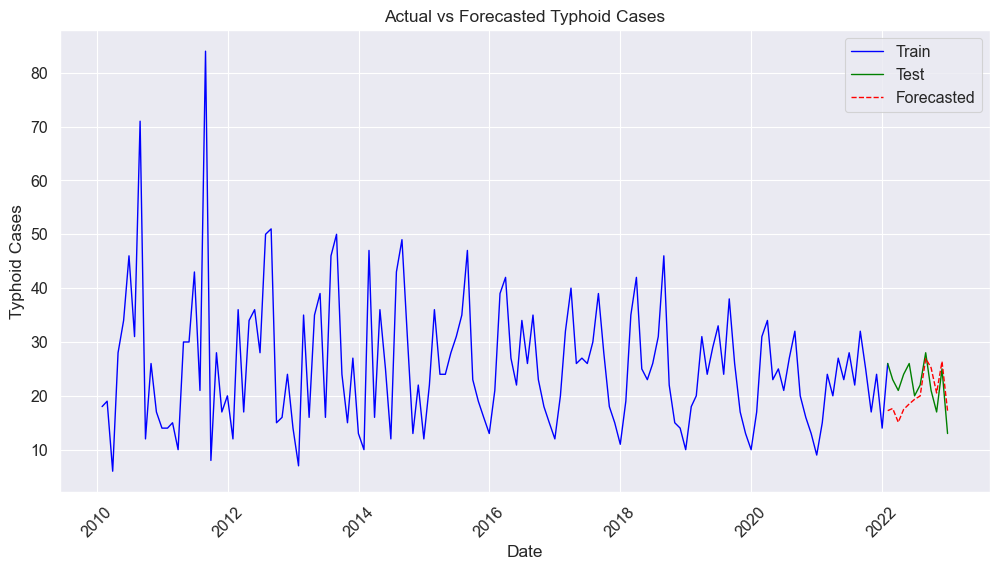

In [52]:
# Plot actual and forecasted values using Seaborn
from matplotlib.lines import Line2D
sns.lineplot(data=typhoid_df.iloc[0:145], x='date', y='typhoid_cases', label='Train', color='blue')
sns.lineplot(data=typhoid_df.iloc[144:156], x='date', y='typhoid_cases', label='Test', color='green')
sns.lineplot(data=result.iloc[144:156], 
             x='date', 
             y='typhoid_cases', 
             label='Forecasted', 
             color='red', 
             linestyle='--')

plt.xticks(rotation=45)
plt.title('Actual vs Forecasted Typhoid Cases')
plt.xlabel('Date')
plt.ylabel('Typhoid Cases')
plt.legend()
plt.show()

In [53]:
print(f"Mean squared error: {mean_squared_error(typhoid_df.iloc[144:156], result.iloc[144:156])}")

Mean squared error: 24.54144052003826


In [54]:
# Calculate forecast differences
differences = [predicted - actual for predicted, actual in zip(result.iloc[144:156]['typhoid_cases'], 
                                                               typhoid_df.iloc[144:156]['typhoid_cases'])]

# Calculate forecast bias
bias = sum(differences) / len(differences)
print("Forecast Bias:", bias)

Forecast Bias: -2.039999046555377


In [55]:
def calculate_pda(predicted_values, actual_values):
    # Initialize the value of the correct directions variable
    correct_directions = 0
    
    # Iterate each value
    for i in range(1, len(predicted_values)):
        # Calculate predicted and actual directions
        pred_change = predicted_values[i] - predicted_values[i - 1]
        actual_change = actual_values[i] - actual_values[i - 1]
        
        # Check if the predictions match the actual directions
        if (pred_change > 0 and actual_change > 0) or (pred_change < 0 and actual_change < 0):
            correct_directions += 1

    # Calculate PDA
    pda = (correct_directions / (len(predicted_values) - 1)) * 100
    return pda
    
# Calculate PDA
pda = calculate_pda(typhoid_df.iloc[144:156]['typhoid_cases'], result.iloc[144:156]['typhoid_cases'])
print("Prediction Direction Accuracy:", pda, '%')

Prediction Direction Accuracy: 81.81818181818183 %


**Conclusion:**

- From these performance metrics we can see the following:

	1. Forecast Bias: on average our model underestimates the predictions with an average bias of 3.7998.
	2. Prediction Direction Accuracy (PDA): in 90.91% of the cases the direction of the value (whether it increases or decreases) is correctly forecasted.

In [56]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_absolute_error

# Actual and predicted values
actual_values = typhoid_df.iloc[144:156]['typhoid_cases']
predicted_values = result.iloc[144:156]['typhoid_cases']

# Get the Mean Absolute Error
mae = mean_absolute_error(actual_values, predicted_values)
print("Mean Absolute Error:", mae)

# Get the Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(actual_values, predicted_values)
print("Mean Absolute Percentage Error:", mape)

# Calculate the mean squared error
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error:", mse)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 4.260327770362987
Mean Absolute Percentage Error: 0.1967513898202398
Mean Squared Error: 24.54144052003826
Root Mean Squared Error: 4.953931824322804
